In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation



In [2]:

def distance(q1,q2,rr=0,so=0):
    return(round(np.linalg.norm(q2-q1),2) -rr - so)


In [3]:
def u_att(zeta,d_star,q,q0):
    d=distance(q,q0)
    if (d<=d_star):
        return(((zeta * (d**2) * 1/2)))
    else:
        return(((d_star * zeta * d)- (1/2 * zeta * (d_star)**2)))

def att_grad(zeta,d_star,q,q0):
    d=distance(q,q0)
    if (d<=d_star):
        return((zeta * (q-q0) ))
    else:
        return((d_star * zeta * (q-q0)/d))

In [4]:
def u_rep(n,q_star,q,oq,rr,so):
    r= []
    for array in (oq.T):
        array=array.reshape(2,1)
        d= distance(q,array,rr,so)
        if d<=q_star:
            r.append((0.5 * n * ((1/d)-(1/q_star))**2))
        else:
            r.append(0)
    return(sum(r))


    
def rep_grad(n,q_star,q,oq,rr,so):
    r=np.zeros((2,1))
    for array in (oq.T):
        array=array.reshape(2,1)
        d= distance(q,array,rr,so)
        if d<=q_star:
            r=np.append(r,(n* ((1/q_star)-(1/d))* ((q-(array))/(d**3))),axis=1)
        else:
            r=np.append(r,np.zeros((2,1)),axis= 1)

    return(np.sum(r,axis=1).reshape(2,1))



In [5]:
def GradientDescent(q,oq,q0,alpha,max_iter,n,q_star,zeta,d_star,U_star,rr,so):
    success=False
    U = u_rep(n,q_star,q,oq,rr,so) + u_att(zeta,d_star,q,q0)
    U_hist=[U]
    q_hist= q
    for i in range(max_iter):
        
        if U > U_star:
            grad_total= rep_grad(n,q_star,q,oq,rr,so) + att_grad(zeta,d_star,q,q0)
            q = q - alpha * (grad_total/np.linalg.norm(grad_total))
            U =  u_rep(n,q_star,q,oq,rr,so) + u_att(zeta,d_star,q,q0)
            q_hist= np.hstack((q_hist,q))
            U_hist.append(U)
            if i % 25 == 0:
                print(f"Potential after {i} iterations is "+str(U))
                # print(q)
        else:
            print("Algorithm converged successfully and Robot has reached goal location")
            break
        if (i == max_iter-1):
            print("Robot is either at local minima or loop ran out of maximum  iterations")
            
    return(q_hist,U_hist)

In [6]:

env_size=100
q = np.random.randint(0,10,size=(2,1))
oq=np.random.randint(10,env_size,size=(2,20))
q0=np.random.randint(100,150,size=(2,1))
print("Randomly generated start position is \n "  + str(q))
print("Randomly generated Goal position is \n"  + str(q0))
print("Randomly generated obstacles are \n"  + str(oq))

max_iter = 2000
alpha = 0.1
n = 1
zeta = 1
U_star = 0.1
q_star = 1
d_star = 5
robot_radius = 1
obstacle_size = 5
q_hist, U_hist = GradientDescent(
    q, oq, q0, alpha, max_iter, n, q_star, zeta, d_star, U_star, robot_radius, obstacle_size)


Randomly generated start position is 
 [[5]
 [8]]
Randomly generated Goal position is 
[[149]
 [100]]
Randomly generated obstacles are 
[[21 69 48 49 30 80 16 54 99 29 41 72 28 21 28 79 30 37 40 64]
 [38 81 55 36 70 84 40 21 59 40 10 29 56 81 19 78 38 24 75 11]]
Potential after 0 iterations is 841.4
Potential after 25 iterations is 828.9
Potential after 50 iterations is 816.4
Potential after 75 iterations is 803.9
Potential after 100 iterations is 791.4
Potential after 125 iterations is 778.9
Potential after 150 iterations is 766.4
Potential after 175 iterations is 753.9
Potential after 200 iterations is 743.3897764628533
Potential after 225 iterations is 734.8275110501448
Potential after 250 iterations is 723.7092975206612
Potential after 275 iterations is 711.35
Potential after 300 iterations is 698.85
Potential after 325 iterations is 686.35
Potential after 350 iterations is 673.85
Potential after 375 iterations is 661.35
Potential after 400 iterations is 648.85
Potential after 425 

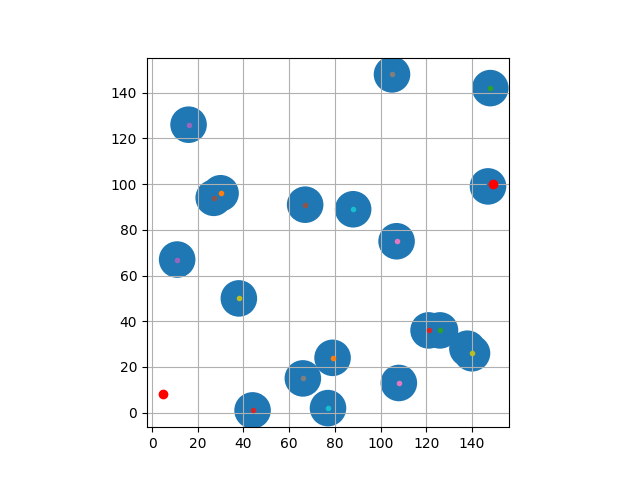

In [7]:
%matplotlib widget
from matplotlib.pyplot import figure


dd=np.random.randint(0,150,size=(2,20))
fig7, axesd = plt.subplots()
for point in (dd.T):
    point=point.reshape(1,2)
    plt.plot(point[0,0],point[0,1], marker= ".")
    circle=plt.Circle((point[0,0],point[0,1]),8,fill=True)
    axesd.set_aspect(1)
    axesd.add_artist(circle)
    
plt.plot(q[0,0],q[1,0], marker="o",color="red")
plt.plot(q0[0,0],q0[1,0], marker="o",color="red")


plt.grid()
plt.show()


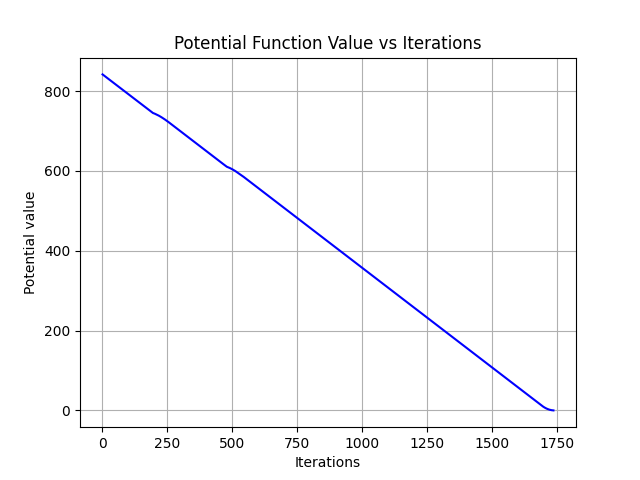

In [8]:

fig1=plt.figure()
X= np.arange(1,len(U_hist)+1)
plt.plot(X,U_hist,color="blue")
plt.title("Potential Function Value vs Iterations")
plt.xlabel("Iterations")
plt.ylabel("Potential value")
plt.grid()
plt.show(fig1)

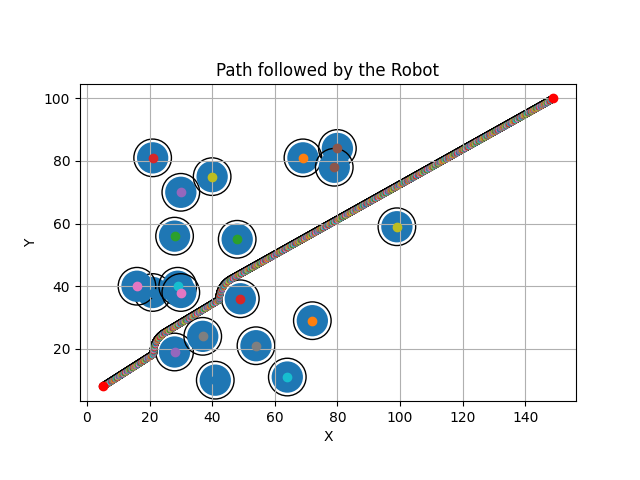

In [9]:



fig3, axes = plt.subplots()
for ob in (oq.T):
    ob=ob.reshape(1,2)
    plt.plot(ob[0,0],ob[0,1],marker="o")
    circle= plt.Circle((ob[0,0],ob[0,1]),obstacle_size,fill=True)
    circle2=plt.Circle((ob[0,0],ob[0,1]),obstacle_size+q_star,fill=False)
    axes.set_aspect(1)
    axes.add_artist(circle)
    axes.add_artist(circle2)



for point in (q_hist.T):
    point=point.reshape(1,2)
    plt.plot(point[0,0],point[0,1], marker= ".")
    circle3= plt.Circle((point[0,0],point[0,1]),robot_radius,fill=False)
    axes.add_artist(circle3)

plt.plot(q[0,0],q[1,0], marker="o",color="red")
plt.plot(q0[0,0],q0[1,0], marker="o",color="red")

plt.title("Path followed by the Robot")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show(fig3)

/tmp/ipykernel_9256/1714739810.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig2)
/tmp/ipykernel_9256/2607421390.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  r.append((0.5 * n * ((1/d)-(1/q_star))**2))
/home/atharva_patwe/.local/lib/python3.10/site-packages/mpl_toolkits/mplot3d/proj3d.py:113: RuntimeWarning: invalid value encountered in true_divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


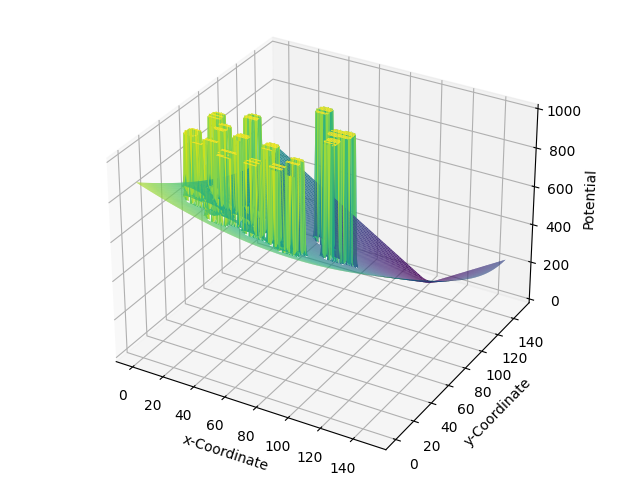

In [10]:

fig2 = plt.figure()
ax = Axes3D(fig2)

x = np.arange(0, 150, 1)
y = np.arange(0, 150, 1)
Z1 = np.empty((len(x), len(y)))
for j in range(len(y)):
    for i in range(len(x)):
        if sum(list(map(lambda x: x <= obstacle_size, list(map(lambda q: distance(np.array([x[i], y[j]]).reshape(2, 1), q.reshape(2, 1)), oq.T))))) >= 1:
            Z1[i, j] = 1000
        else:
            Z1[i, j] = u_rep(n, q_star, np.array([x[i], y[j]]).reshape(2, 1), oq, robot_radius,
                             obstacle_size) + u_att(zeta, d_star, np.array([x[i], y[j]]).reshape(2, 1), q0)
            
# for point in (q_hist.T):
#     point=point.reshape(2,1)
#     ax.scatter(point[0,0],point[1,0],(u_rep(n, q_star, point, oq, robot_radius,
#                              obstacle_size) + u_att(zeta, d_star, point, q0)))

X1, Y1 = np.meshgrid(x, y)

plot_potential = ax.plot_surface(
    X1, Y1, Z1, rstride=1, cstride=1, cmap='viridis', edgecolor='None')
# for point in (q_hist.T):
#     point=point.reshape(2,1)
#     ax.scatter(point[0,0],point[1,0],(u_rep(n, q_star, point, oq, robot_radius,
#                              obstacle_size) + u_att(zeta, d_star, point, q0)))
ax.set_title("3D plot for potential value")
ax.set_xlabel('x-Coordinate')
ax.set_ylabel('y-Coordinate')
ax.set_zlabel('Potential')
plt.show(fig2)
